## Aluno: 

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [ ]:
# resposta 1

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from google.colab import files


In [11]:
# Usando o colab
from google.colab import files
uploaded = files.upload()

Saving house_prices.csv to house_prices.csv


In [31]:

house =  pd.read_csv('house_prices.csv', sep=';') 
house.head()

,tamanho,n_quartos,idade,preco
0,2104.0,3.0,45.0,399900
1,2104.0,3.0,45.0,399900
2,1600.0,3.0,30.0,329900
3,2400.0,3.0,32.0,369000
4,1416.0,2.0,10.0,232000


In [32]:
 house.describe()

,tamanho,n_quartos,idade,preco
count,49.000000,49.000000,48.000000,50.000000
mean,1990.693878,3.142857,23.500000,337783.700000
std,782.736152,0.763763,25.304108,122946.740155
min,852.000000,1.000000,2.000000,169900.000000
25%,1427.000000,3.000000,9.750000,249892.500000
50%,1888.000000,3.000000,18.000000,299900.000000
75%,2238.000000,4.000000,32.000000,392175.000000
max,4478.000000,5.000000,170.000000,699900.000000


In [33]:
house.shape


(50, 4)

In [34]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
tamanho      49 non-null float64
n_quartos    49 non-null float64
idade        48 non-null float64
preco        50 non-null int64
dtypes: float64(3), int64(1)
memory usage: 1.6 KB


In [35]:
house.dropna(inplace=True) # Remove em branco
house.drop_duplicates(keep='first', inplace=True) # Remove duplicatas
house.size

house.describe()

,tamanho,n_quartos,idade,preco
count,46.000000,46.000000,46.000000,46.000000
mean,2005.760870,3.173913,23.239130,342315.108696
std,802.711936,0.768963,25.620465,125731.986959
min,852.000000,1.000000,2.000000,169900.000000
25%,1429.500000,3.000000,9.250000,249900.000000
50%,1889.000000,3.000000,18.000000,306950.000000
75%,2284.500000,4.000000,31.500000,392175.000000
max,4478.000000,5.000000,170.000000,699900.000000


## 2) Há outliers no data set? Se sim, trate-os de forma adequada

In [39]:
# resposta 2
# Remover outliers usando o Zscore
house = house[(np.abs(stats.zscore(house)) < 3).all(axis=1)] 
house.size

176

## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [40]:
# resposta 3
house['n_andares'] = np.random.choice([1, 2], house.shape[0])
house.head()

,tamanho,n_quartos,idade,preco,n_andares
0,2104.0,3.0,45.0,399900,1
2,1600.0,3.0,30.0,329900,1
3,2400.0,3.0,32.0,369000,2
4,1416.0,2.0,10.0,232000,1
5,3000.0,4.0,14.0,539900,2


## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

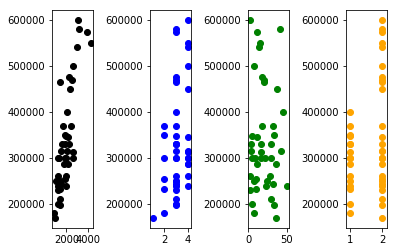

In [56]:
# resposta 4
fig = plt.figure()
tamanho = fig.add_subplot(1,7,1)
tamanho.scatter(house['tamanho'], house['preco'],color='black')

n_quartos = fig.add_subplot(1,7,3)
n_quartos.scatter(house['n_quartos'], house['preco'],color='b')

idade = fig.add_subplot(1,7,5)
idade.scatter(house['idade'], house['preco'],color='g')

n_andares = fig.add_subplot(1,7,7)
n_andares.scatter(house['n_andares'], house['preco'],color='orange')

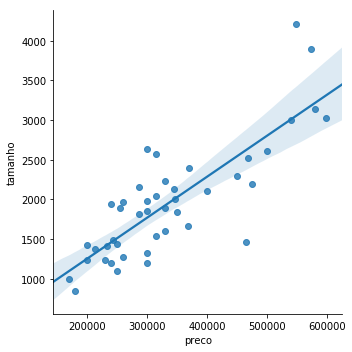

In [52]:
sns.lmplot(x='preco', y='tamanho', data=house)

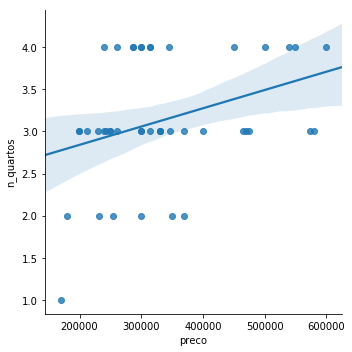

In [54]:
sns.lmplot(x='preco', y='n_quartos', data=house)

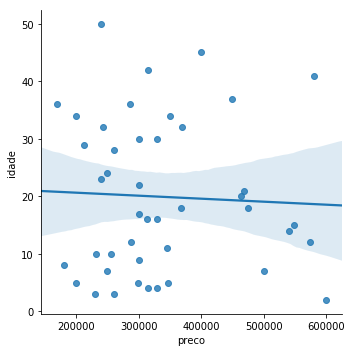

In [55]:
sns.lmplot(x='preco', y='idade', data=house)

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(house.drop(['preco'], axis = 1), house['preco'], test_size=0.30, random_state=42)


## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [70]:
# resposta 6
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train.ravel()) 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_teste_treino = pd.DataFrame(modelo.predict(X_train))
erro_medio = math.sqrt(mean_squared_error(y_train,y_teste_treino))
erro_medio

66965.11719833287

## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? 

In [72]:
# resposta 7

y_predicoes = modelo.predict(X_test)

mse = math.sqrt(mean_squared_error(y_test,y_predicoes))
mse


58685.7417734766